### ChatGPT를 활용한 데이터 과학 분야 직무 및 연봉 정보 데이터 분석

### 학습 내용
 * 데이터 과학 분야 직무 관련 데이터 셋 분석
 * ChatGPT를 활용한 데이터 분석해 보기

### 내용
 * 데이터 소개
 * 직무별 평균 연봉 알아보기
 * 직무별 상위 10%의 직무 경력 수준
 * 나라별 연봉 수준 알아보기

###  데이터 소개

* 데이터 소개

데이터 셋 URL : https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023
  * 데이터 과학 분야에서 근무하는 사람들의 연봉 정보를 담고 있음.
  * 2023년 정보를 포함.

```
데이터 과학 채용 연봉 데이터셋은 총 11개의 열(column)로 구성되어 있습니다. 각각의 열은 다음과 같습니다:

work_year: 연봉이 지급된 해(연도)
experience_level: 해당 연도에 해당하는 직무 경력 수준
employment_type: 해당 직무의 고용 형태
job_title: 해당 연도에 근무한 직무
salary: 총 지급된 급여 총액
salary_currency: 급여 통화 (ISO 4217 통화 코드)
salaryinusd: 미국 달러로 환산된 급여
employee_residence: 해당 연도에 근무한 직원의 주요 거주 국가 (ISO 3166 국가 코드)
remote_ratio: 원격으로 수행된 업무 비율
company_location: 고용주의 본사나 계약 지점이 위치한 국가
company_size: 해당 연도에 근무한 회사의 중앙값 인원 수

```

### 필수 라이브러리 불러오기

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import folium

### 데이터 불러오기

In [87]:
# CSV 파일 경로 지정
# \data\dataScienceSalaries2023
file_path = "../../data/dataScienceSalaries2023/ds_salaries.csv"

# CSV 파일 불러오기
df = pd.read_csv(file_path)
df.shape

(3755, 11)

### 데이터 탐색

In [88]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S


In [89]:
df.tail(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


* 한줄 확인 : 2020년도, 2021년도 연봉의 정보도 있다.

In [90]:
# 결측치 확인
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

* 한줄 확인 : 비어있는 값(결측치)는 없음.

In [91]:
# 통계치 확인
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [92]:
df.describe(include="O")

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


* 수치형 데이터에 대해서 통계값(개수, 평균, 표준편차, 최소, 최대값 등)

* 2020년부터 2023년까지의 데이터
* 여러국가의 연봉(USD, EUR 등) 
    * 몇개 국가의 연봉일까?
* 미국 달러 환산 급여로 최소($5132 ~ $450000) - 약 600만원 ~ 약 5억 2천
    * 600만원 받는 사람의 정보는?
    * 5억 2천 받는 사람의 정보는?
* remote_ratio : 원격 근무 비율
    * 원격 근무가 전혀 없는 사람이 있다.
    * 전부 재택 근무를 하는 사람도 있다.
    * 데이터가 어떻게 되어 있을까?

In [93]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


* 추가 궁금한 것
  * 직무별 임금의 평균(job_title, salary_in_usd 관련 컬럼)
    * 직무별 상위 10%의 직무 경력 수준(job_title, salary_in_usd, experience_level 관련 컬럼)
  * 해당 근무 연도와 거주 국가를 활용한 미국 달러로 표시된 급여(work_year, company_location, salary_in_usd)
  * 직무별, 연차별, 기업 규모별 연봉(job_title, experience_level, company_size 관련 컬럼)

### 직무별 임금의 평균(job_title, salary_in_usd 관련 컬럼)

In [94]:
len(df['job_title'].unique()), df['job_title'].unique()

(93,
 array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
        'Applied Scientist', 'Data Analyst', 'Data Modeler',
        'Research Engineer', 'Analytics Engineer',
        'Business Intelligence Engineer', 'Machine Learning Engineer',
        'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
        'Data Quality Analyst', 'Compliance Data Analyst',
        'Data Architect', 'Applied Machine Learning Engineer',
        'AI Developer', 'Research Scientist', 'Data Analytics Manager',
        'Business Data Analyst', 'Applied Data Scientist',
        'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
        'Head of Data', 'Data Science Manager', 'Data Manager',
        'Machine Learning Researcher', 'Big Data Engineer',
        'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
        'Director of Data Science', 'Machine Learning Scientist',
        'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
        'Applie

* 93개 직무가 있다.

### 직무를 그룹화 시킨 후에 해당 직무의 평균 연봉 알아보기

In [95]:
df.groupby('job_title')['salary_in_usd'].mean()

job_title
3D Computer Vision Researcher     21352.250000
AI Developer                     136666.090909
AI Programmer                     55000.000000
AI Scientist                     110120.875000
Analytics Engineer               152368.631068
                                     ...      
Research Engineer                163108.378378
Research Scientist               161214.195122
Software Data Engineer            62510.000000
Staff Data Analyst                15000.000000
Staff Data Scientist             105000.000000
Name: salary_in_usd, Length: 93, dtype: float64

In [96]:
# 직무별 임금 평균 구하기
salary_mean_by_job = df.groupby('job_title')['salary_in_usd'].mean()
salary_mean_by_job

job_title
3D Computer Vision Researcher     21352.250000
AI Developer                     136666.090909
AI Programmer                     55000.000000
AI Scientist                     110120.875000
Analytics Engineer               152368.631068
                                     ...      
Research Engineer                163108.378378
Research Scientist               161214.195122
Software Data Engineer            62510.000000
Staff Data Analyst                15000.000000
Staff Data Scientist             105000.000000
Name: salary_in_usd, Length: 93, dtype: float64

* 추가 질문 
  * 어떤 직무가 가장 연봉이 높을까?
  * ChatGPT 질문 : 직무별 임금 평균을 구하고 가장 높은 연봉이 어떤 직무인지 알고 싶어, 코드를 부탁해.

In [97]:
# 가장 높은 평균 연봉 구하기
max_salary = salary_mean_by_job.max()
# print( max_salary )

# 가장 높은 평균 연봉을 가진 직무 구하기
max_salary_job = salary_mean_by_job.idxmax()
#print( max_salary_job )

print(f"가장 높은 직무와 연봉 : {max_salary_job} {max_salary}")

가장 높은 직무와 연봉 : Data Science Tech Lead 375000.0


### 직무별 상위 10%의 직무 경력 수준
 * 관련 컬럼 : job_title, salary_in_usd, experience_level

In [98]:
grouped_df = df.groupby('job_title')
grouped_df['experience_level'].min()

job_title
3D Computer Vision Researcher    EN
AI Developer                     EN
AI Programmer                    EN
AI Scientist                     EN
Analytics Engineer               EN
                                 ..
Research Engineer                EN
Research Scientist               EN
Software Data Engineer           MI
Staff Data Analyst               EX
Staff Data Scientist             SE
Name: experience_level, Length: 93, dtype: object

In [99]:
# 직무별 연봉 상위 10%의 경력 수준 구하기

# 직무별로 데이터를 그룹화
grouped_df = df.groupby('job_title')

# 그룹별로 상위 10%의 데이터를 선택하여 경력 수준 추출
get_exp_level = lambda x: x.loc[x['salary_in_usd'].nlargest(int(len(x)*0.1)).index]['experience_level'].unique()
salary_top_10_by_job = grouped_df.apply(get_exp_level)

# 결과 출력
print(salary_top_10_by_job)
salary_top_10_by_job.head(20)

job_title
3D Computer Vision Researcher          []
AI Developer                         [EN]
AI Programmer                          []
AI Scientist                         [SE]
Analytics Engineer                   [SE]
                                   ...   
Research Engineer                    [SE]
Research Scientist               [MI, SE]
Software Data Engineer                 []
Staff Data Analyst                     []
Staff Data Scientist                   []
Length: 93, dtype: object


job_title
3D Computer Vision Researcher           []
AI Developer                          [EN]
AI Programmer                           []
AI Scientist                          [SE]
Analytics Engineer                    [SE]
Applied Data Scientist                [SE]
Applied Machine Learning Engineer       []
Applied Machine Learning Scientist    [MI]
Applied Scientist                     [SE]
Autonomous Vehicle Technician           []
Azure Data Engineer                     []
BI Analyst                              []
BI Data Analyst                       [EX]
BI Data Engineer                        []
BI Developer                          [SE]
Big Data Architect                      []
Big Data Engineer                     [SE]
Business Data Analyst                 [MI]
Business Intelligence Engineer          []
Cloud Data Architect                    []
dtype: object

In [100]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

```
SE: Software Engineer - 기술적 역량을 갖춘 전문가 
  * 3년 이상의 경력 보유한 주니어 개발자~10년 이상의 경력 보유한 시니어 엔지니어
  
MI: Manager or Individual Contributor
  * 해당 분야에서 프로젝트나 인적자원 등의 관리를 담당하는 매니저나 개별적인 업무 수행을 담당하는 전문가, 또는 이 두 역할을 모두 겸하고 있는 직무를 의미
  
EN: Entry Level (입문 수준 해당 분야 1~3년 경력)
  * 해당 분야에서 경력이 거의 없는 인턴 또는 입문 수준의 직무를 의미
  
EX: Executive Level 
  * 해당 분야에서 최고위 관리자 또는 경영진 수준의 역할을 수행하는 직무
  * 전문가나 경영진을 대상으로 하며, 대체로 15년 이상의 경력을 보유한 사람들이 많이 해당
```

```
AI Developer                          [EN] - 도대체 어떤 나라와 어떤 기업인가?
AI Scientist                          [SE]
Analytics Engineer                    [SE]
Applied Data Scientist                [SE]
Applied Machine Learning Scientist    [MI]
Applied Scientist                     [SE]
BI Data Analyst                       [EX]
BI Developer                          [SE]
Big Data Engineer                     [SE]
Business Data Analyst                 [MI]
AI Programmer                           []
Applied Machine Learning Engineer       []
Autonomous Vehicle Technician           []
Azure Data Engineer                     []
BI Analyst                              []
BI Data Engineer                        []
Big Data Architect                      []
```

In [101]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [102]:
tmp = df.loc[ (df['job_title']=="AI Developer"), : ]
tmp[ tmp['experience_level']=="EN" ]['employee_residence'].unique()

array(['IN', 'SE', 'DE', 'BA', 'MK'], dtype=object)

*  'IN'은 인도, 'SE'는 스웨덴, 'DE'는 독일, 'BA'는 보스니아 헤르체고비나, 'MK'는 북마케도니아 공화국

## ChatGPT 질문 
```
AI Developer                          [EN] - 도대체 어떤 나라와 어떤 기업인가?
AI Scientist                          [SE]
Analytics Engineer                    [SE]
Applied Data Scientist                [SE]
Applied Machine Learning Scientist    [MI]
Applied Scientist                     [SE]
BI Data Analyst                       [EX]
BI Developer                          [SE]
Big Data Engineer                     [SE]
Business Data Analyst                 [MI]
==============
이 친구들의 직무에 필요한 기술은 뭐가 있니?
```

```
AI Developer: 인공지능 알고리즘 및 딥러닝 기술에 대한 지식과 프로그래밍 언어(예: Python, Java) 및 프레임워크(예: TensorFlow, PyTorch)에 대한 숙련도가 필요합니다. (Python, Tensorflow, Pytorch 등)

AI Scientist: 기계 학습 및 딥러닝 알고리즘, 통계학 및 선형대수학 등의 수학적 이론 지식, 프로그래밍 언어 및 프레임워크에 대한 숙련도가 필요합니다.
(알고리즘, 통계학, 선형대수, 프레임 워크 등)

Analytics Engineer: 데이터 파이프라인 및 ETL(Extract-Transform-Load) 프로세스 개발, 데이터 웨어하우스 구축, 데이터 시각화 등에 대한 기술적 이해와 프로그래밍 언어(예: Python, SQL) 및 클라우드 서비스(예: AWS, GCP)에 대한 경험이 필요합니다.
(데이터 파이프라인, 데이터 시각화 - SQL, AWS, GCP 등)

Applied Data Scientist: 데이터 마이닝 및 머신러닝 알고리즘, 통계학, 데이터 분석 기술 등의 지식과 Python, R 등의 프로그래밍 언어, 머신러닝 프레임워크 등의 기술적 지식이 필요합니다.
(Python, R, ML/DL 알고리즘, 통계학 등)

Applied Machine Learning Scientist: 머신러닝 및 딥러닝 알고리즘 개발, 데이터 분석, 통계학, Python, R 등의 프로그래밍 언어 및 머신러닝 프레임워크(예: TensorFlow, PyTorch) 등의 기술적 지식이 필요합니다.
(Python, R, ML/DL 알고리즘, 통계학 등)

Applied Scientist: 머신러닝 및 딥러닝 알고리즘 개발, 통계학, 수학 등의 지식과 Python, R 등의 프로그래밍 언어, 머신러닝 프레임워크 등의 기술적 지식이 필요합니다.
BI Data Analyst: 데이터 시각화, 데이터 분석 및 데이터 마이닝 기술, BI 도구(예: Tableau, Power BI) 및 SQL 등의 기술적 지식이 필요합니다.
(Python, R, ML/DL 알고리즘, 통계학, Tableau, SQL 등)


BI Developer: 데이터 웨어하우스 설계 및 개발, ETL 프로세스 개발, BI 도구 등에 대한 지식과 프로그래밍 언어(예: SQL, Python) 및 클라우드 서비스(예: AWS, Azure) 등의 기술적
(데이터 웨어하우스 설계 및 개발(DB), SQL, Python, AWS, Azure 등)


Big Data Engineer: 대용량 데이터 처리를 위한 분산 컴퓨팅 시스템 및 클러스터링 시스템(예: Hadoop, Spark)에 대한 이해와 이를 활용한 대용량 데이터 처리 경험이 필요합니다.
(분산 컴퓨팅, Hadoop, Spark 등)


Business Data Analyst: 비즈니스 전략 및 경영 이해, 데이터 분석 기술, 통계학, SQL 등의 지식과 BI 도구(예: Tableau, Power BI) 등의 기술적 지식이 필요
(Tableau, Power BI, SQL, 데이터 분석 기술, 통계학 등)
```

```
AI Scientist의 구체적인 업무는 뭐니?
```

```
AI Scientist는 인공지능 분야에서 고급 수준의 연구와 개발 업무를 수행하는 직무입니다. 이는 대부분 기업이나 조직에서 인공지능을 활용하는 데 있어서 매우 중요한 역할

업무 : 인공지능 알고리즘 개발, 머신러닝 모델 구현, 딥러닝 모델 구현, 데이터 분석 및 모델 평가, 인공지능 기술 연구, 인공지능 분야의 논문 작성
```

```
AI Developer의 업무는 무엇인가요?
```

```
AI Developer는 인공지능(AI)을 개발하는 데에 전문적으로 참여하는 직무
인공지능 알고리즘 개발, 딥러닝 모델 구현(Tensorflow, Pytorch 등), 데이터 전처리(pandas, numpy 등), 모델 평가, 모델 배포(AWS, Azure 등)
```

### 엔지니어 직군은 어떤 것이 있을까?

In [105]:
for one in list(df['job_title'].unique()):
    if 'Engineer' in one:
        print(one)

ML Engineer
Research Engineer
Analytics Engineer
Business Intelligence Engineer
Machine Learning Engineer
Data Engineer
Computer Vision Engineer
Applied Machine Learning Engineer
ETL Engineer
Data DevOps Engineer
Big Data Engineer
BI Data Engineer
MLOps Engineer
Cloud Database Engineer
Data Infrastructure Engineer
Software Data Engineer
Data Operations Engineer
Machine Learning Infrastructure Engineer
Deep Learning Engineer
Machine Learning Software Engineer
Computer Vision Software Engineer
Azure Data Engineer
Marketing Data Engineer
Data Science Engineer
Machine Learning Research Engineer
NLP Engineer
Principal Machine Learning Engineer
Data Analytics Engineer
Cloud Data Engineer
Lead Machine Learning Engineer
Lead Data Engineer
Principal Data Engineer


In [104]:
for one in df['job_title'].unique():
    if 'Engineer' in one:
        print(one)

ML Engineer
Research Engineer
Analytics Engineer
Business Intelligence Engineer
Machine Learning Engineer
Data Engineer
Computer Vision Engineer
Applied Machine Learning Engineer
ETL Engineer
Data DevOps Engineer
Big Data Engineer
BI Data Engineer
MLOps Engineer
Cloud Database Engineer
Data Infrastructure Engineer
Software Data Engineer
Data Operations Engineer
Machine Learning Infrastructure Engineer
Deep Learning Engineer
Machine Learning Software Engineer
Computer Vision Software Engineer
Azure Data Engineer
Marketing Data Engineer
Data Science Engineer
Machine Learning Research Engineer
NLP Engineer
Principal Machine Learning Engineer
Data Analytics Engineer
Cloud Data Engineer
Lead Machine Learning Engineer
Lead Data Engineer
Principal Data Engineer


```
Software Data Engineer의 업무와 필요한 기술은 어떤 것이 있을까요?
```

```
- 대규모 데이터를 처리하고 분석하는데 필요한 소프트웨어 시스템을 설계, 구현, 관리하는 업무를 수행
- 대규모 데이터 처리 시스템 설계, 데이터 저장소 구축(DB), 데이터 처리 및 분석(Pandas 등), 데이터 파이프라인 구축: 데이터를 수집, 전처리, 분석, 저장 등의 단계로 구성된 데이터 파이프라인을 구축, 데이터 모델링(ML/DL 알고리즘)
- Hadoop, Spark, NoSQL, DB(SQL), Python, Java, Scala (프로그래밍 능력), DB(SQL)
- 기타 기술과 지식, 트렌드
```

In [35]:
df['job_title'].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

### 데이터, 마케팅, 애널리스트 관련 직군

In [37]:
for one in list(df['job_title'].unique()):
    if ('Data' in one) or ('Marketing' in one) or ("Analyst" in one):
        print(one)

Principal Data Scientist
Data Scientist
Data Analyst
Data Modeler
Data Strategist
Data Engineer
Data Quality Analyst
Compliance Data Analyst
Data Architect
Data Analytics Manager
Business Data Analyst
Applied Data Scientist
Staff Data Analyst
Data DevOps Engineer
Head of Data
Data Science Manager
Data Manager
Big Data Engineer
Data Specialist
Lead Data Analyst
BI Data Engineer
Director of Data Science
Lead Data Scientist
Cloud Database Engineer
Financial Data Analyst
Data Infrastructure Engineer
Software Data Engineer
Data Operations Engineer
Data Science Lead
BI Analyst
Data Science Consultant
Data Analytics Specialist
BI Data Analyst
Head of Data Science
Insight Analyst
Big Data Architect
Product Data Analyst
Azure Data Engineer
Marketing Data Engineer
Data Analytics Lead
Data Lead
Data Science Engineer
Manager Data Management
Data Analytics Engineer
Data Analytics Consultant
Data Management Specialist
Data Science Tech Lead
Data Scientist Lead
Cloud Data Engineer
Data Operations Ana

```
Product Data Analyst의 업무와 필요 기술 알려주렴.
```

```
Product Data Analyst는 제품 또는 서비스의 성능 및 사용자 경험 개선을 위해 데이터를 수집, 분석하고, 보고서를 작성하여 의사 결정을 지원하는 업무를 수행하는 직무

데이터 분석: 제품 또는 서비스 사용자의 행동 및 경험을 분석하여 문제를 파악하고 개선 방안을 모색합니다.
보고서 작성: 데이터 분석 결과를 바탕으로 보고서를 작성하고, 의사 결정을 지원합니다.
A/B 테스트
데이터 시각화(예: Tableau, PowerBI 등)
데이터 모델링

필요 기술 (SQL, Python, 머신러닝, 데이터 시각화, 데이터 분석 기술)
```

```
Business Data Analyst의 업무와 필요 기술
```

```
Business Data Analyst는 기업의 비즈니스 성과를 분석하여 의사 결정에 활용하는 업무

데이터 수집 및 전처리(Python, R, SQL 등)
데이터 분석: 수집한 데이터를 분석하여 기업의 비즈니스 성과를 평가하고, 문제점을 파악합니다.
보고서 작성: 데이터 분석 결과를 바탕으로 보고서를 작성하고, 의사 결정을 지원
데이터 시각화: 데이터를 시각화하여 효과적으로 분석 및 보고서 작성에 활용(Tableau, PowerBI 등)
데이터 모델링: 데이터 모델링 기술을 활용하여 데이터 분석
    
비즈니스 지식: 기업의 비즈니스 모델, 시장 트렌드, 경쟁사 분석 등에 대한 지식
```

### 해당 근무 연도와 거주 국가를 활용한 미국 달러로 표시된 급여(work_year, company_location, salary_in_usd)

In [38]:
new_df = df[['work_year', 'company_location', 'salary_in_usd']].copy()
new_df

,work_year,company_location,salary_in_usd
0,2023,ES,85847
1,2023,US,30000
2,2023,US,25500
3,2023,CA,175000
4,2023,CA,120000
...,...,...,...
3750,2020,US,412000
3751,2021,US,151000
3752,2020,US,105000
3753,2020,US,100000


### 지역별 연간 평균 급여 계산, 가장 높은 지역순으로 정렬

In [39]:
avg_salary_by_location = new_df.groupby('company_location')['salary_in_usd'].mean().reset_index()
avg_salary_by_location.sort_values(by="salary_in_usd", ascending=False)

,company_location,salary_in_usd
37,IL,271446.500000
59,PR,167500.000000
70,US,151822.009539
62,RU,140333.333333
12,CA,131917.689655
...,...,...
71,VN,12000.000000
1,AL,10000.000000
47,MA,10000.000000
9,BO,7500.000000


In [48]:
### 회사 위치는 어디에 있지?
avg_salary_by_location['company_location'].unique()

array(['AE', 'AL', 'AM', 'AR', 'AS', 'AT', 'AU', 'BA', 'BE', 'BO', 'BR',
       'BS', 'CA', 'CF', 'CH', 'CL', 'CN', 'CO', 'CR', 'CZ', 'DE', 'DK',
       'DZ', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GH', 'GR', 'HK', 'HN',
       'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IR', 'IT', 'JP', 'KE',
       'LT', 'LU', 'LV', 'MA', 'MD', 'MK', 'MT', 'MX', 'MY', 'NG', 'NL',
       'NZ', 'PH', 'PK', 'PL', 'PR', 'PT', 'RO', 'RU', 'SE', 'SG', 'SI',
       'SK', 'TH', 'TR', 'UA', 'US', 'VN'], dtype=object)

In [49]:
print( len(avg_salary_by_location['company_location'].unique()) )

72


```
AE: United Arab Emirates (아랍에미리트 연합)
AL: Albania (알바니아)
AM: Armenia (아르메니아)
AR: Argentina (아르헨티나)
AS: American Samoa (아메리칸 사모아)
AT: Austria (오스트리아)
AU: Australia (호주)
BA: Bosnia and Herzegovina (보스니아 헤르체고비나)
BE: Belgium (벨기에)
BO: Bolivia (볼리비아)
BR: Brazil (브라질)
BS: Bahamas (바하마)
CA: Canada (캐나다)
CF: Central African Republic (중앙 아프리카 공화국)
CH: Switzerland (스위스)
CL: Chile (칠레)
CN: China (중국)
CO: Colombia (콜롬비아)
CR: Costa Rica (코스타리카)
CZ: Czech Republic (체코)
DE: Germany (독일)
DK: Denmark (덴마크)
DZ: Algeria (알제리)
EE: Estonia (에스토니아)
EG: Egypt (이집트)
ES: Spain (스페인)
FI: Finland (핀란드)
FR: France (프랑스)
GB: United Kingdom (영국)
GH: Ghana (가나)
GR: Greece (그리스)
HK: Hong Kong (홍콩)
HN: Honduras (온두라스)
HR: Croatia (크로아티아)
HU: Hungary (헝가리)
ID: Indonesia (인도네시아)
IE: Ireland (아일랜드)
IL: Israel (이스라엘)
IN: India (인도)
IQ: Iraq (이라크)
IR: Iran (이란)
IT: Italy (이탈리아)
JP: Japan (일본)
KE: Kenya (케냐)
LT: Lithuania (리투아니아)
LU: Luxembourg (룩셈부르크)
LV: Latvia (라트비아)
MA: Morocco (모로코)
MD: Moldova (몰도바)
MK: North Macedonia (북마케도니아)
MT: Malta (몰타)
MX: Mexico (멕시코)
MY: Malaysia (말레이시아)
NG: Nigeria (나이지리아)
NL: Netherlands (네덜란드)
NZ: New Zealand (뉴질랜드)
PH: Philippines (필리핀)
PK: Pakistan (파키스탄)
PL: Poland (폴란드)
PR: Puerto Rico (푸에르토리코)
PT: Portugal (포르투갈)
RO: Romania(루마니아)
RU: Russia (러시아)
SE: Sweden (스웨덴)
SG: Singapore (싱가포르)
SI: Slovenia (슬로베니아)
SK: Slovakia (슬로바키아)
TH: Thailand (태국)
TR: Turkey (터키)
UA: Ukraine (우크라이나)
US: United States (미국)
VN: Vietnam (베트남)
```

* 72개국에 분포된 데이터 관련 직업군.

### work_year별로 salary_in_usd 분포 시각화

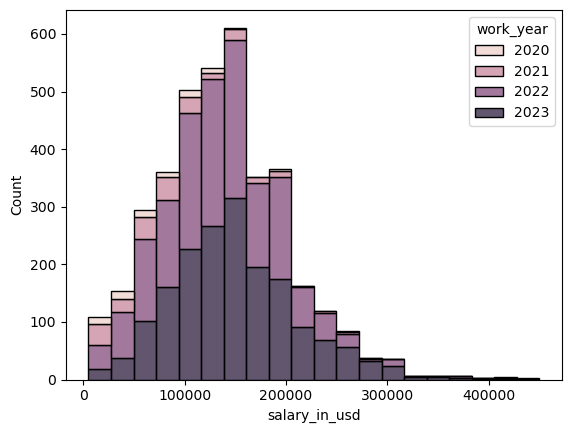

In [50]:
sns.histplot(data=new_df, 
             x='salary_in_usd', 
             hue='work_year', 
             multiple='stack', bins=20)

plt.show()

* 연봉이 10만 달러~ 20만 달러가 많다.

### company_location별로 급여(salary_in_usd)분포 시각화

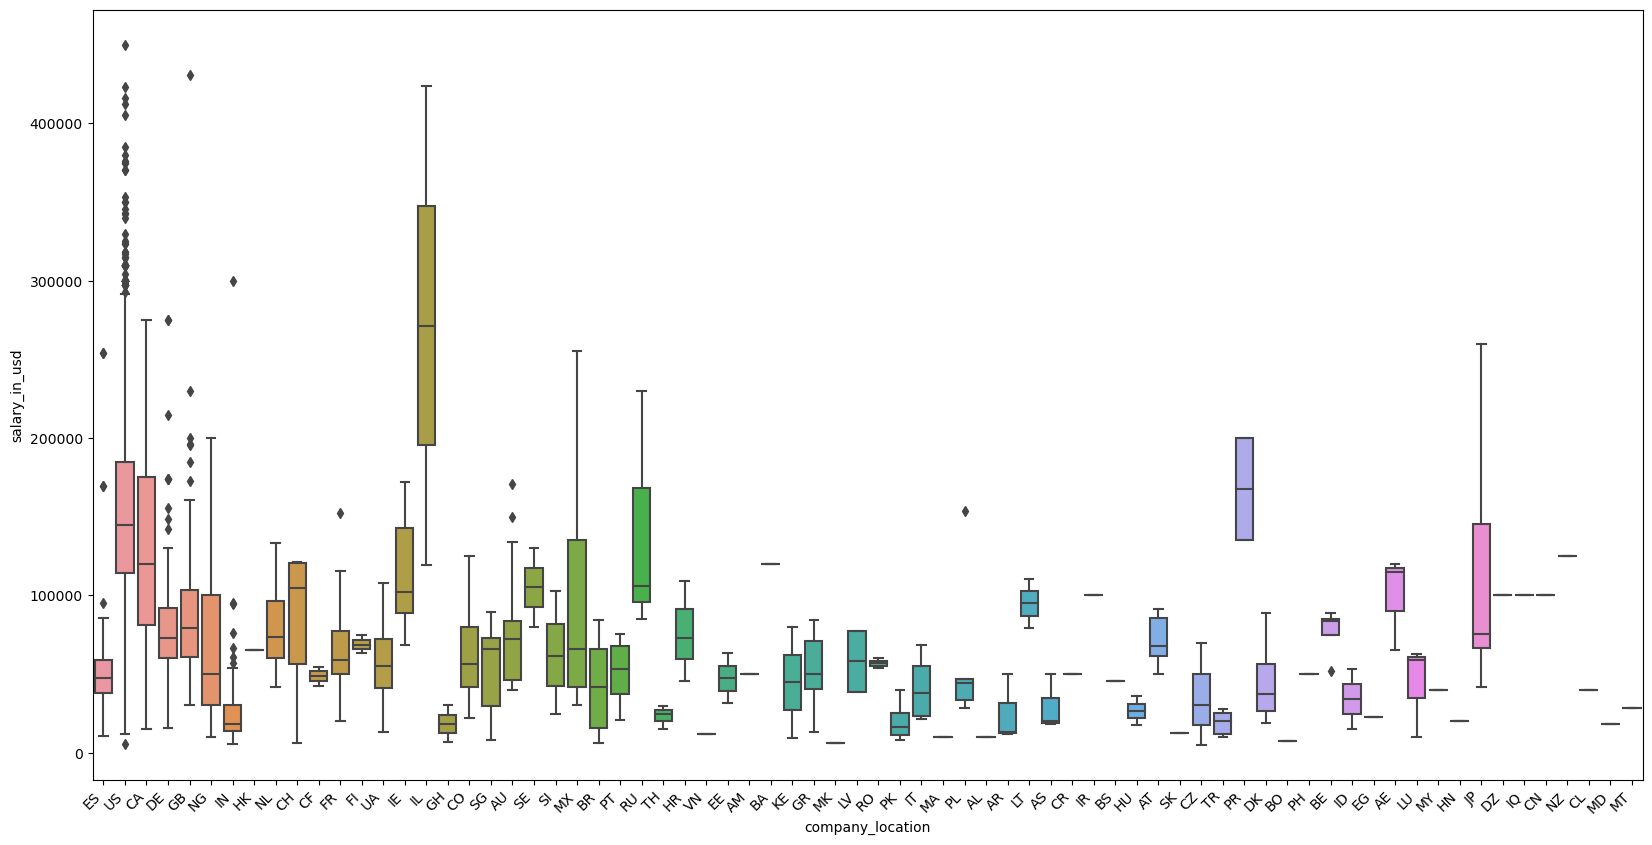

In [63]:
plt.figure(figsize=(20,10))
sns.boxplot(data=new_df, x='company_location', y='salary_in_usd')
plt.xticks(rotation=45, ha='right')
plt.show()

* IL : Israel (이스라엘)이 연봉 평균이 높다.
* US : 미국은 고액 연봉자도 많이 존재.
* FR : 프랑스는 편차가 크지 않지만, 상위 연봉에 속한다.

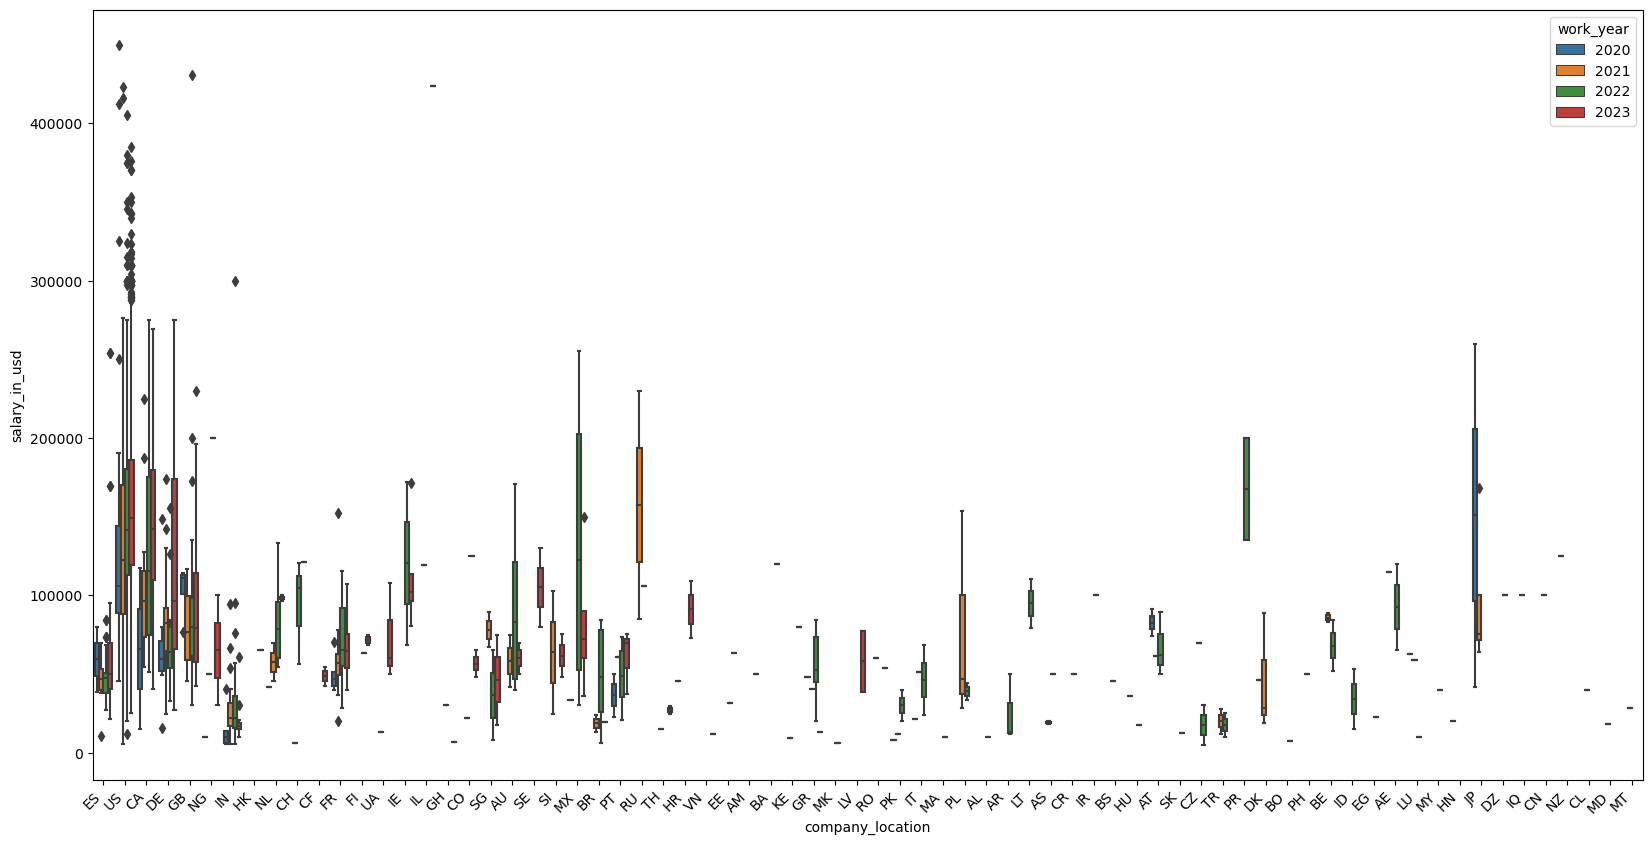

In [64]:
plt.figure(figsize=(20,10))
sns.boxplot(data=new_df, x='company_location', 
            hue="work_year", y='salary_in_usd')
plt.xticks(rotation=45, ha='right')
plt.show()

In [65]:
avg_salary_by_location

,company_location,salary_in_usd
37,IL,271446.500000
59,PR,167500.000000
70,US,151822.009539
62,RU,140333.333333
12,CA,131917.689655
...,...,...
71,VN,12000.000000
1,AL,10000.000000
47,MA,10000.000000
9,BO,7500.000000


In [66]:
# new_df

In [67]:
# sort_values()를 이용한 데이터 정렬
avg_salary_by_location.sort_values('salary_in_usd', 
                                   ascending=False, 
                                   inplace=True)

In [68]:
avg_salary_by_location.head(20)

,company_location,salary_in_usd
37,IL,271446.500000
59,PR,167500.000000
70,US,151822.009539
62,RU,140333.333333
12,CA,131917.689655
55,NZ,125000.000000
7,BA,120000.000000
36,IE,114943.428571
42,JP,114127.333333
63,SE,105000.000000


In [69]:
### 상위 20개국 리스트
country20 = avg_salary_by_location.head(20)['company_location'].to_list()
country20

['IL',
 'PR',
 'US',
 'RU',
 'CA',
 'NZ',
 'BA',
 'IE',
 'JP',
 'SE',
 'CN',
 'IR',
 'IQ',
 'DZ',
 'AE',
 'MX',
 'LT',
 'DE',
 'GB',
 'CH']

In [75]:
new_df

,work_year,company_location,salary_in_usd
0,2023,ES,85847
1,2023,US,30000
2,2023,US,25500
3,2023,CA,175000
4,2023,CA,120000
...,...,...,...
3750,2020,US,412000
3751,2021,US,151000
3752,2020,US,105000
3753,2020,US,100000


In [76]:
new_df1 = new_df.loc[ new_df['company_location'].isin(country20), :]
new_df1

,work_year,company_location,salary_in_usd
1,2023,US,30000
2,2023,US,25500
3,2023,CA,175000
4,2023,CA,120000
5,2023,US,222200
...,...,...,...
3749,2021,US,165000
3750,2020,US,412000
3751,2021,US,151000
3752,2020,US,105000


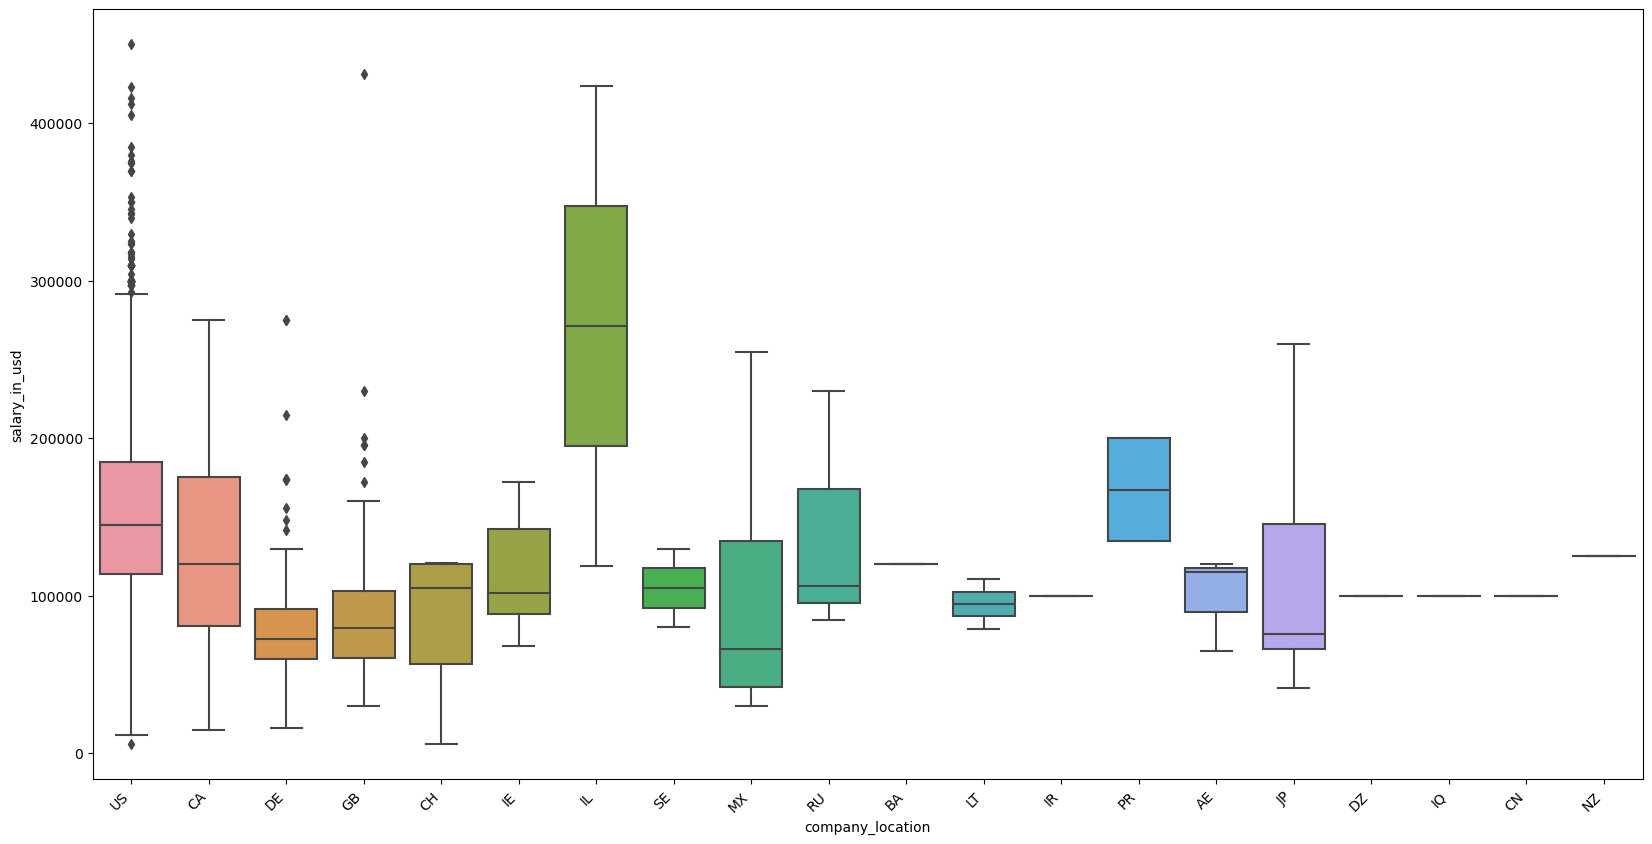

In [77]:
plt.figure(figsize=(20,10))
sns.boxplot(data=new_df1, x='company_location', y='salary_in_usd')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
### 약자 이름을 한글로 변경

In [83]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 글꼴 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 폰트 이름 얻어오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 한글 글꼴 지정
plt.rcParams['font.family'] = font_name

In [84]:
country_names = [
    '이스라엘',
    '푸에르토리코',
    '미국',
    '러시아',
    '캐나다',
    '뉴질랜드',
    '보스니아 헤르체고비나',
    '아일랜드',
    '일본',
    '스웨덴',
    '중국',
    '이란',
    '이라크',
    '알제리',
    '아랍에미리트 연합',
    '멕시코',
    '리투아니아',
    '독일',
    '영국',
    '스위스'
]

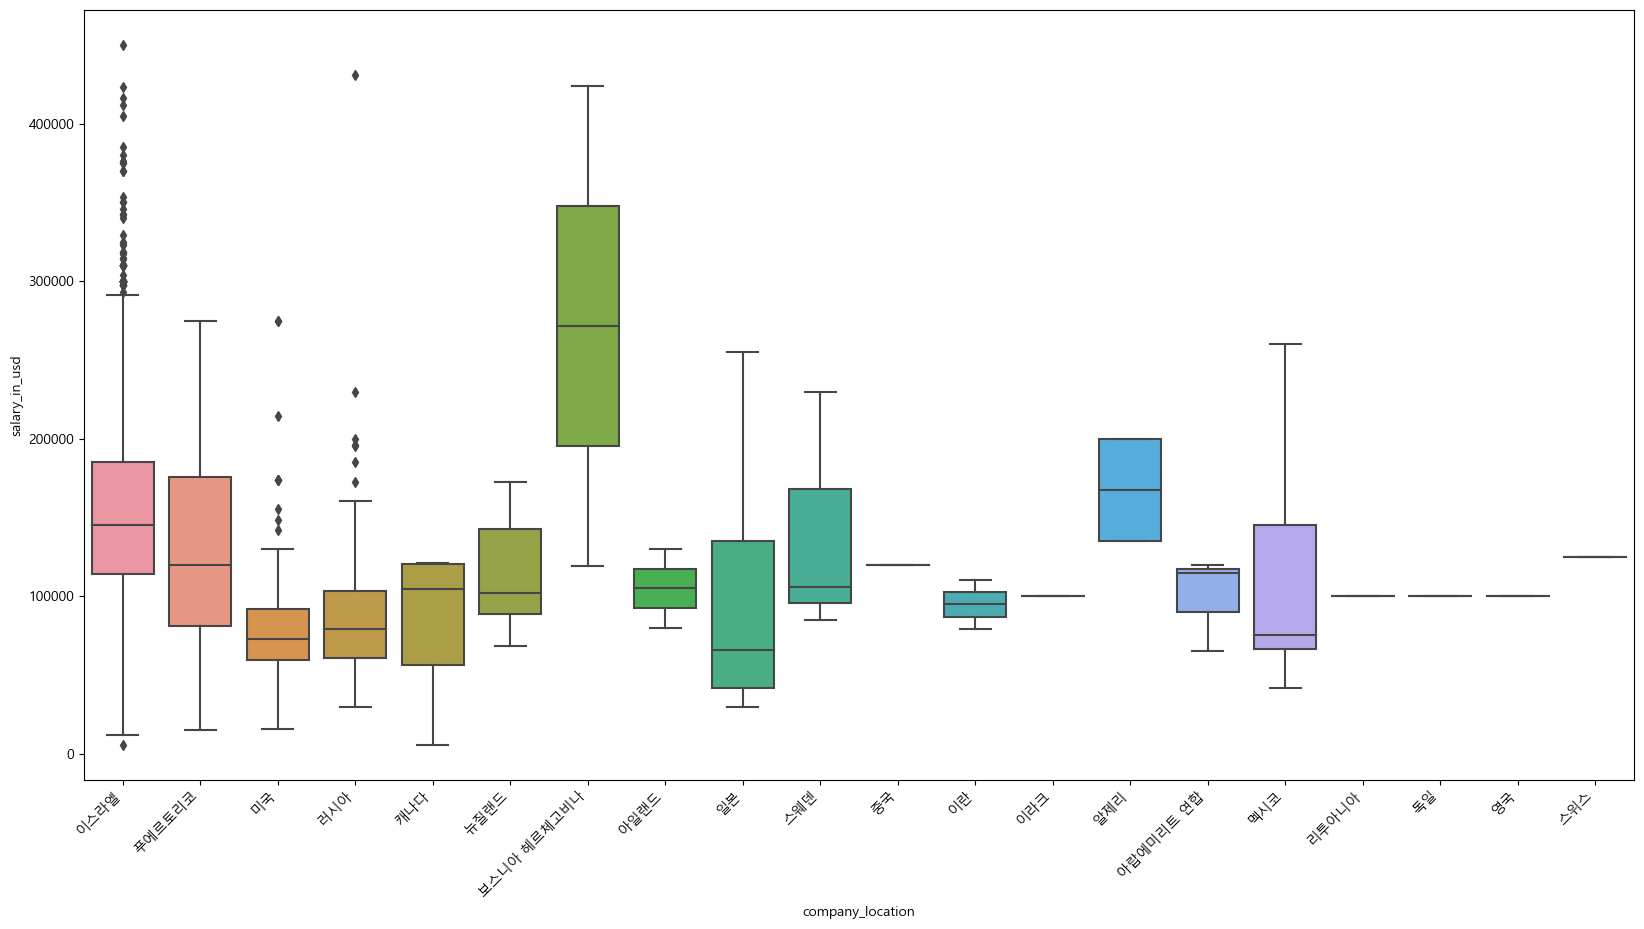

In [85]:
# 한글 라벨을 적용한 그래프 그리기
plt.figure(figsize=(20,10))
sns.boxplot(data=new_df1, x='company_location', y='salary_in_usd')
plt.xticks(
    ticks=range(len(country_names)),
    labels=country_names,
    rotation=45,
    ha='right'
)
plt.show()